In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("data/2019.csv.gz", parse_dates=['Timestamp'])
df.head(2)

,Timestamp,Which pandas APIs do you use?,What readers / writers do you use?,"How often do you work with ""wide"" DataFrames (100s of columns or more)",Which extension types do you use?,What documentation resources do you use?,Do you like the new documentation hierarchy?,"If think that the new documentation layout is worse, what do you dislike about it?",What Pandas resources have you used for support in the last six months?,Which would help you most right now?,...,How often do you use Pandas?,Have you ever contributed a pull request to pandas?,What Operating Systems do you use?,Is Python your main language?,"Do you use any of the following tools to isolate Python environments, if any? (multiple answers)",Python 2 or 3?,Workflow,What are some other libraries that you often use with pandas?,How easy is it for you to upgrade to newer versions of Python libraries,Do you use pandas as part of a larger group?
0,2019-08-06 10:01:25,"IO (read_*, to_*);MultiIndex;GroupBy;reshape (...",CSV;JSON;Parquet;SQL,Occasionally,Categorical;Sparse;Datetime with Timezone;Null...,Release notes;User Guide;API reference,Better,NaN,Documentation,Performance improvements,...,Occasionally,Yes,Linux,Yes,Docker;Conda,3,"Interactive (e.g. Jupyter Notebook, IPython, P...",sklearn,4.0,I use pandas mostly on my own
1,2019-08-06 10:01:56,"IO (read_*, to_*);Visualization (DataFrame.plo...",CSV;JSON;HDF,Occasionally,NaN,User Guide;API reference,Unchanged,NaN,Documentation;GitHub issue trackers (reading p...,Performance improvements,...,Weekly,No,Linux;MacOS,Yes,Virtualenv / pipenv;Conda,2;3,"Interactive (e.g. Jupyter Notebook, IPython, P...",NaN,1.0,"Beyond my group, many people throughout my ins..."


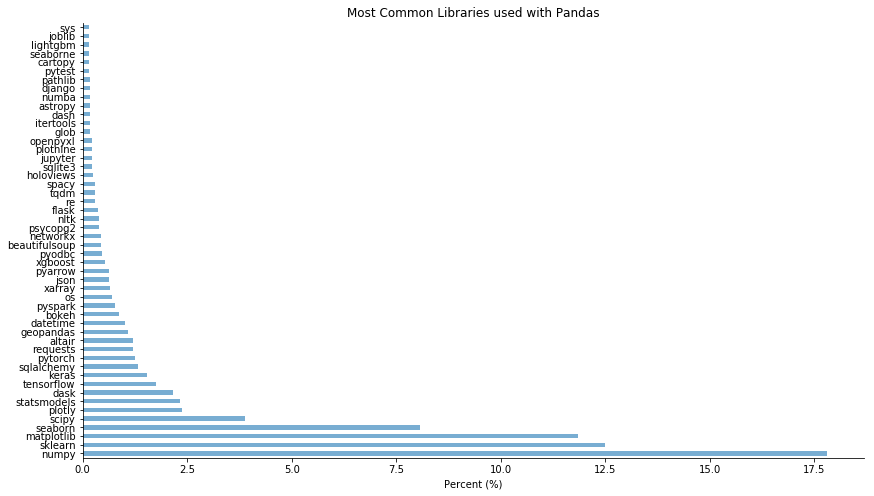

In [154]:
plt.figure(figsize = (14, 8))

words = []

for i in df['What are some other libraries that you often use with pandas?'].dropna():
    line = str(i)
    line = line.split(",")
    line = [i.replace(' ', "") for i in line]
    for word in line:
        word = word.lower()
        if word == "":
            pass
        elif word == "...":
            pass
        elif word in ["scikit-learn", "scikitlearn", "scikit", "sk-learn", "sci-kitlearn"]:
            words.append('sklearn')
        elif word in ['statsmodel']:
            words.append('statsmodels')
        elif word in ['bumpy']:
            words.append('numpy')
        else:
            words.append(word)
            
(((pd.Series(words).value_counts()) /len(words)) * 100).head(50).plot(kind = 'barh', alpha = 0.6)
plt.title("Most Common Libraries used with Pandas")
plt.ylabel("")
sns.despine()
plt.xlabel("Percent (%)")
plt.show()

## I like to visualize grids of plots like this is python:

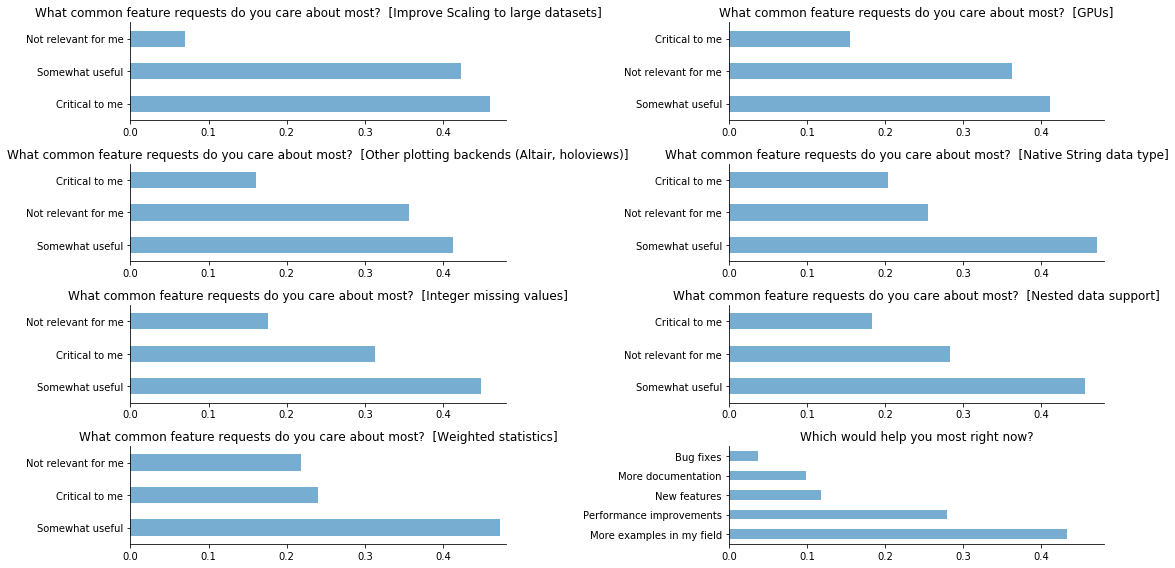

In [153]:
# matplotlib object orientied api is simply beautiful
fig, ax = plt.subplots(4, 2, figsize = (16, 8))
ax = ax.ravel()
improve = [i for i in df.columns if "requests" in i]
improve.append('Which would help you most right now?')
counts = [df[i].value_counts() / len(df) for i in df[improve]]
for i in range(len(counts)):
    counts[i].plot(kind = 'barh', ax = ax[i], alpha = 0.6)
    ax[i].set_title(counts[i].name)
    ax[i].set_xlim([0, 0.48])
    sns.despine()   
plt.tight_layout()
plt.show()